# Vision Lenguage Models
This script implements an image-caption matching system using OpenAI's CLIP model.
It processes a collection of images and predefined captions, computing their 
embeddings to find the most suitable caption for each image based on semantic similarity.
The system utilizes the ViT-B-32 architecture pretrained by OpenAI to encode both
images and text into the same feature space, enabling direct comparison through
cosine similarity. The best matching caption for each image is displayed alongside 
the image itself.

So in order the script will:
1. Load the pretrained CLIP ViT-B-32 model
2. Process a collection of images and captions
3. Compute embeddings for both images and text
4. Calculate similarity scores between all pairs
5. Display each image with its best matching caption

Realized by Arsenio Hugo, Mello Grand Matteo, Bertamini Riccardo

Requirements: `open_clip_torch`, `PyTorch`, `Pillow`, `matplotlib`

In [1]:
import open_clip
import torch
from PIL import Image
import os
from pathlib import Path
import matplotlib.pyplot as plt

/opt/anaconda3/envs/skin_detection/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load CLIP Model and Tokenizer

In [2]:
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='openai', device='cpu')

tokenizer = open_clip.get_tokenizer('ViT-B-32')

/opt/anaconda3/envs/skin_detection/lib/python3.10/site-packages/open_clip/factory.py:388: UserWarning: These pretrained weights were trained with QuickGELU activation but the model config does not have that enabled. Consider using a model config with a "-quickgelu" suffix or enable with a flag.
  warnings.warn(


### Define image path and load images
Specify the folder containing the images, load them using PIL, and prepare them for the model using the preprocessor.

Make sure you have a folder named images in the same directory as this notebook. Then place your .png image files inside the images folder.

In [3]:
image_folder_name = "images"
PATH = image_folder_name

image_folder = Path(PATH)

image_paths = list(image_folder.glob("*.png"))
images = [Image.open(image_path) for image_path in image_paths]

In [4]:
captions = [
    "When you realize it's Monday.",
    "Me trying to act normal in public.",
    "That face you make when someone says 'be yourself'.",
    "My reaction when there's no Wi-Fi.",
    "Current mood: confused.",
    "Current mood: thriving on coffee and chaos.",
    "When you hear someone say 'free food.'",
    "Me trying to act professional on a video call.",
    "When you accidentally open the front camera."
]

### Tokenize text captions

In [5]:
text_inputs = torch.cat([tokenizer(caption) for caption in captions]).to("cpu")

### Encode images

In [6]:
image_features = []
for image in images:
    image_input = preprocess(image).unsqueeze(0)
    with torch.no_grad():
        features = model.encode_image(image_input)
        image_features.append(features)

if image_features:
    image_features = torch.cat(image_features)
else:
    raise ValueError("No images were processed successfully")

### Encode Text and Calculate Similarities

In [7]:
with torch.no_grad():
    text_features = model.encode_text(text_inputs)

    similarities = image_features @ text_features.T
    best_matches = similarities.argmax(dim=1)

### Display results

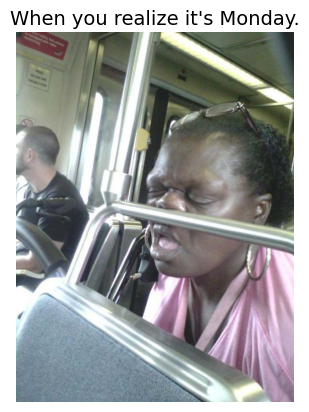

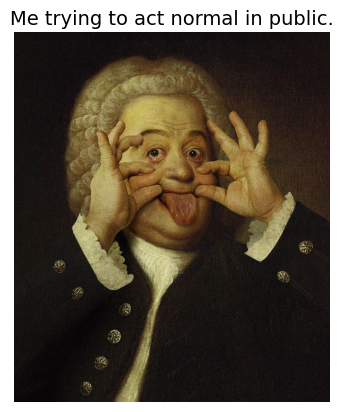

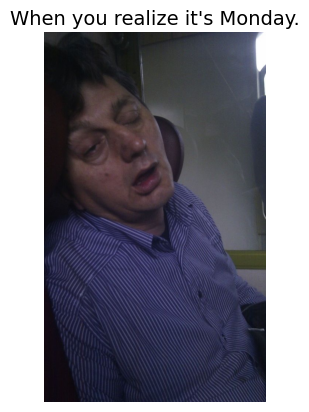

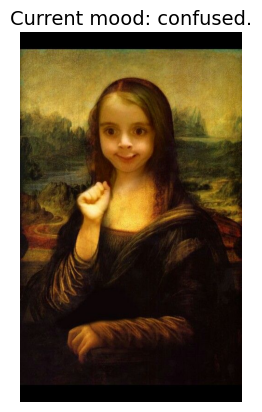

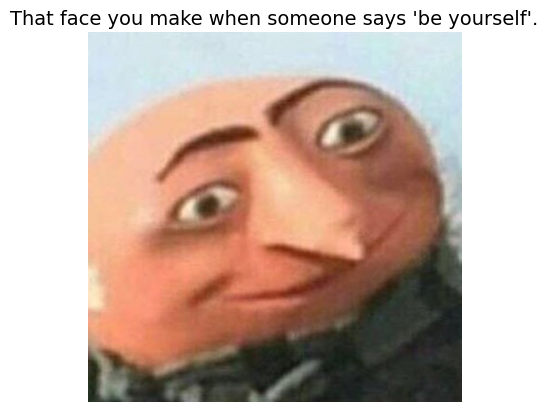

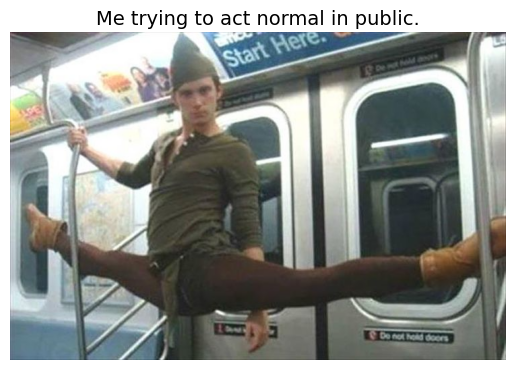

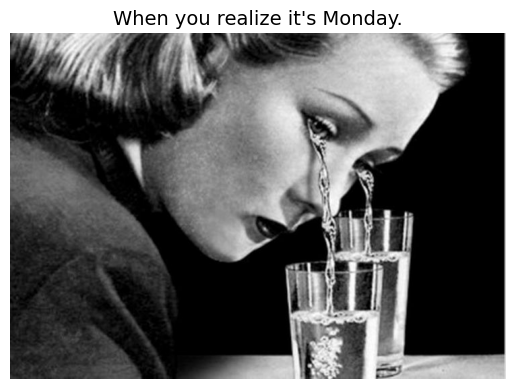

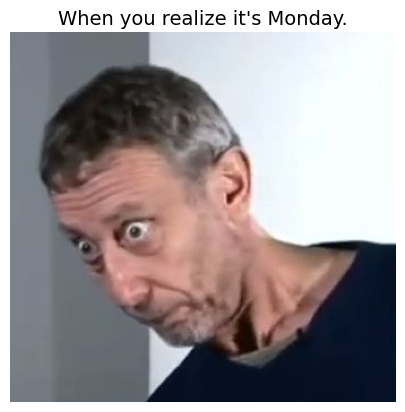

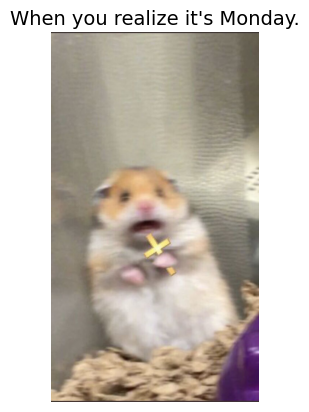

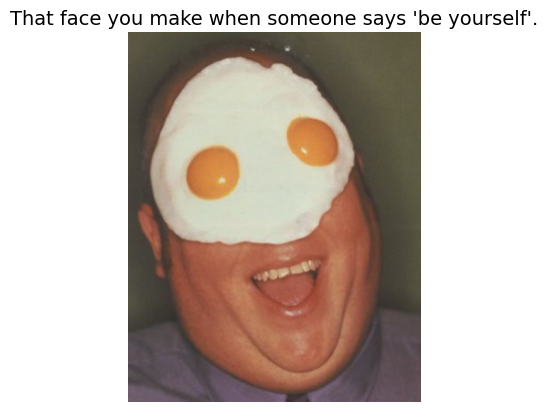

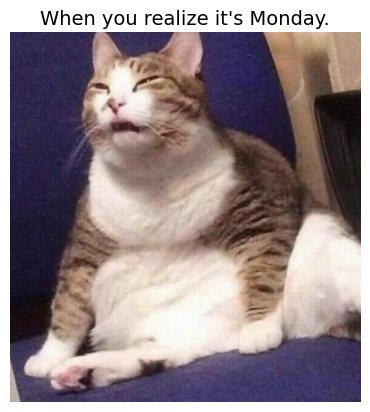

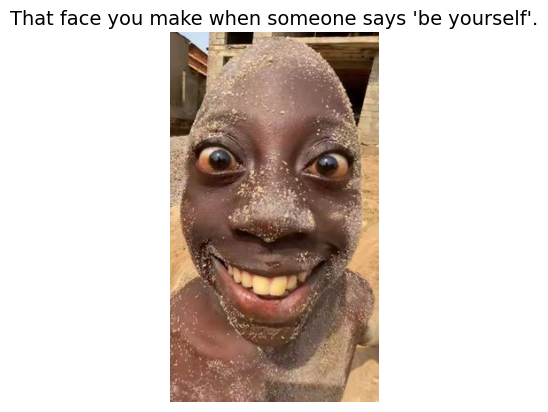

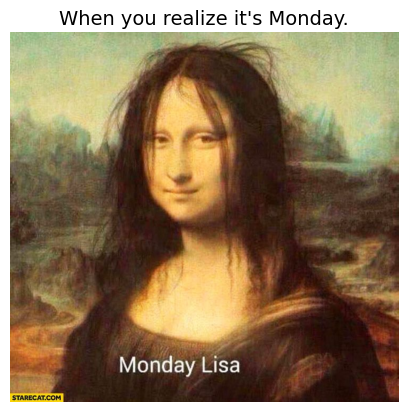

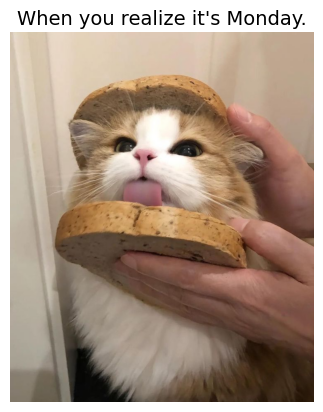

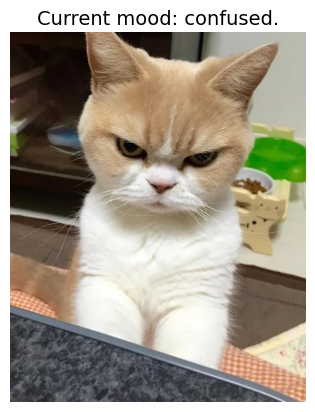

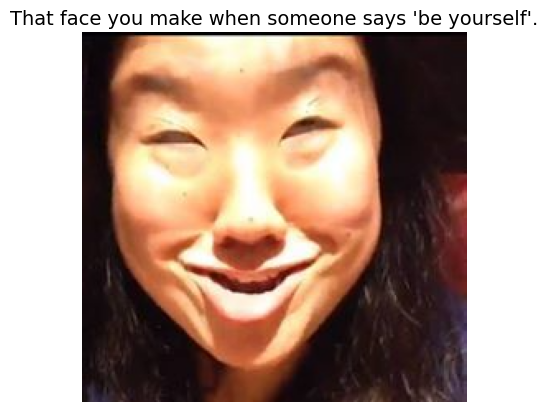

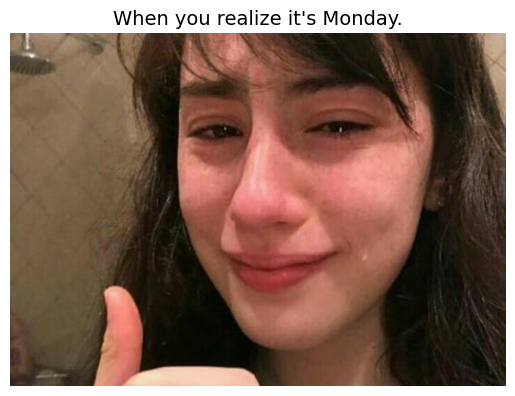

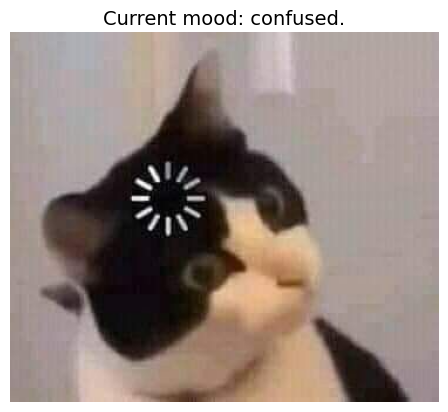

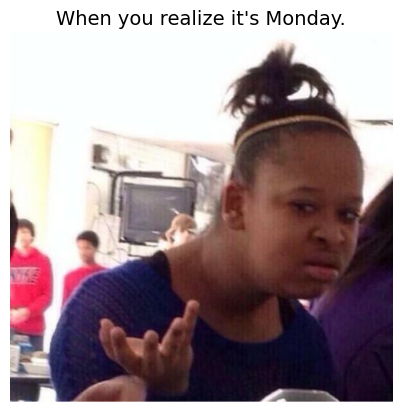

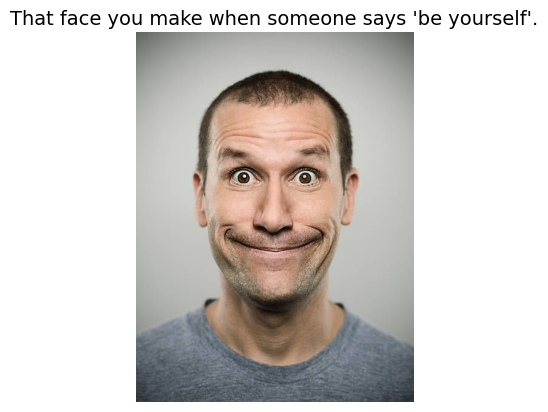

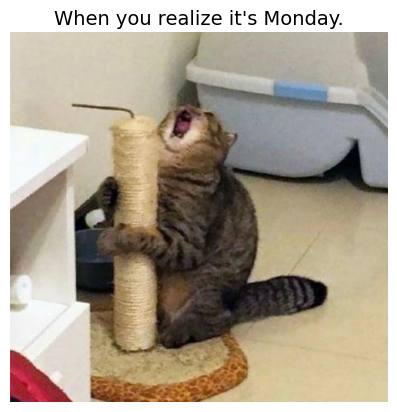

In [8]:
for i, image in enumerate(images):
    plt.imshow(image)
    plt.axis('off')
    plt.title(captions[best_matches[i]], fontsize=14)
    plt.show()